<a href="https://colab.research.google.com/github/yaniv256/VAEs-in-Economics/blob/master/Notebooks/Covid_19_VAEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 with VAEs

## Confirmed Covid-19 cases

### Data

#### Load it

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306,1306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,NaN,Jersey,49.1900,-2.1100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
497,NaN,Puerto Rico,18.2000,-66.5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
498,NaN,Republic of the Congo,-1.4400,15.5560,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
499,NaN,The Bahamas,24.2500,-76.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


#### Join country and province labels

In [2]:
prov_missing = pd.isnull(df.iloc[:,0])

row_index = ['{}, {}'.format(df.iloc[i,1],df.iloc[i,0]) if not prov_missing.iloc[i] 
             else df.iloc[i,1] for i in range(len(df))]

df2= pd.DataFrame(df.iloc[:,4:-1].values, index=row_index, columns=df.columns[4:-1]).dropna()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df2

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Thailand,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
Japan,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
Singapore,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
Nepal,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
Malaysia,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306
"Canada, British Columbia",0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,4,4,4,4,4,4,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,8,8,8,9,12,13,21,21,27,32,32,39,46,64,64,73,103,103,186,231,271,424,424
"Australia, New South Wales",0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,6,6,13,22,22,26,28,38,48,55,65,65,92,112,134,171,210,267,307,353,436,533
"Australia, Victoria",0,0,0,0,1,1,1,1,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,7,7,9,9,10,10,10,11,11,15,18,21,21,36,49,57,71,94,121,121,121,229,296
"Australia, Queensland",0,0,0,0,0,0,0,1,3,2,3,2,2,3,3,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,9,9,9,11,11,13,13,13,15,15,18,20,20,35,46,61,68,78,94,144,184,221,221
Cambodia,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,3,3,5,7,7,7,33,35,37,51,53,84


#### Create train-test split

In [3]:
from sklearn.model_selection import train_test_split 
x_train, x_test = train_test_split(df2, test_size=0.25, random_state=42)

x_train.shape, x_test.shape

((375, 61), (126, 61))

#### Transform to percentiles

In [4]:
from sklearn.preprocessing import QuantileTransformer

qt_trans = QuantileTransformer(n_quantiles=101, random_state=2)
qt_trans.fit(x_train)
x_train = pd.DataFrame(qt_trans.transform(x_train), 
                       index=x_train.index, columns=x_train.columns)
x_test = pd.DataFrame(qt_trans.transform(x_test), 
                       index=x_test.index, columns=x_test.columns)
x_train

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Namibia,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.595000,0.575000,0.560000,0.540000,0.520000,0.530000,0.510000,0.510000,0.500000
Congo (Kinshasa),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610000,0.600000,0.610000,0.595000,0.575000,0.560000,0.560000,0.560000,0.620438,0.620209,0.620000,0.620000
"US, Ohio",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,0.684048,0.685000,0.710000,0.750000,0.771538,0.770000,0.781609,0.790000,0.789345,0.813857,0.826066,0.844272
"US, Norfolk County, MA",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.760000,0.750000,0.730000,0.765000,0.740000,0.790000,0.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Switzerland,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.850000,0.835000,0.901199,0.900810,0.905947,0.909437,0.917361,0.921964,0.931436,0.934150,0.948369,0.950546,0.952828,0.953288,0.959827,0.970091,0.970091,0.984636,0.990001,0.990268,0.990185,0.990189,0.990090,0.988659,0.987911,0.988667,0.989012
"US, Maryland",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.770196,0.750000,0.752874,0.754032,0.750000,0.757500,0.754386,0.760000,0.787573,0.780798,0.801137,0.807895,0.815792
Cabo Verde,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

### Network

#### Build the VAE

In [5]:
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

def make_vae(input_shape):

  latent_dim = 1  
  dense_width = 1024

  input_x = keras.Input(shape=input_shape)

  x = layers.Dense(dense_width, activation='relu')(input_x)
  x = layers.Dense(dense_width, activation='relu')(x)
  x = layers.Dense(dense_width, activation='relu')(x)

  z_mean = layers.Dense(latent_dim)(x)
  z_log_var = layers.Dense(latent_dim)(x)

  encoder = Model(input_x, z_mean)

  def sampling(args):
      z_mean, z_log_var = args
      epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                                mean=0., stddev=1.)
      return z_mean + K.exp(z_log_var) * epsilon

  z = layers.Lambda(sampling)([z_mean, z_log_var])

  # This is the input where we will feed `z`.
  decoder_input = layers.Input(K.int_shape(z)[1:])

  # Upsample to the correct number of units
  x = layers.Dense(dense_width,activation='relu')(decoder_input)
  x = layers.Dense(dense_width,activation='relu')(x)
  x = layers.Dense(dense_width,activation='relu')(x)

  x = layers.Dense(input_shape[0])(x)

  # This is our decoder model.
  decoder = Model(decoder_input, x)

  # We then apply it to `z` to recover the decoded `z`.
  z_decoded = decoder(z)

  class CustomVariationalLayer(keras.layers.Layer):

      def vae_loss(self, x, z_decoded):
          xent_loss = keras.metrics.mse(x, z_decoded)
          kl_loss = -5e-4 * K.mean(
              1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
          return K.mean(xent_loss + kl_loss)

      def call(self, inputs):
          x = inputs[0]
          z_decoded = inputs[1]
          loss = self.vae_loss(x, z_decoded)
          self.add_loss(loss, inputs=inputs)
          # We don't use this output.
          return x

  # We call our custom layer on the input and the decoded output,
  # to obtain the final model output.
  y = CustomVariationalLayer()([input_x, z_decoded])

  vae = Model(input_x, y)
  vae.encoder = encoder
  vae.decoder = decoder

  return vae

#### Train it

In [6]:
from tensorflow import set_random_seed
from numpy.random import seed

seed(42)
set_random_seed(42)

vae = make_vae(input_shape=(x_train.shape[1],))

vae.compile(optimizer='adam', loss=None)

n_batch_sizes=7

history = ['']*n_batch_sizes
titles  = ['']*n_batch_sizes

# Train the VAE on boston housing data

for i in range(n_batch_sizes):

  # Alternate between a few epochs with large batch size (realiable decrease in 
  # loss but weak and overfitting) and a few epochs with small batch size
  # (strong and non-overfitting but could increase loss)
  batch_size = 512*(1-(i%2)) + 16*(i%2)
  epochs = 20*(1-(i%2)) + 60*(i%2)

  print('Batch size:', batch_size)
  titles[i] = 'Round {}, Batch size {}'.format(i+1, batch_size)

  history[i] = vae.fit(x=x_train, y=None,
                       shuffle=True,
                       epochs=epochs,
                       batch_size=batch_size,
                       validation_data=(x_test, None))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Batch size: 512
Train on 375 samples, validate on 126 samples
Epoch 1/20
375/375 [==============================] - 1s 2ms/sample - loss: 0.1740 - val_loss: 0.1658
Epoch 2/20
375/375 [==============================] - 0s 618us/sample - loss: 0.1623 - val_loss: 0.0999
Epoch 3/20
375/375 [==============================] - 0s 606us/sample - loss: 0.0983 - val_loss: 0.1601
Epoch 4/20
375/375 [==============================] - 0s 615us/sample - loss: 0.1517 - val_loss: 0.0681
Epoch 5/20
375/375 [==============================] - 0s 609us/sample - loss: 0.0644 - val_loss: 0.0883
Epoch 6/20
375/375 [==============================] - 0s 621us/sample - loss: 0.0832 - val_loss: 0.0998
Epoch 7/20
375/375 [==============================] - 0s 625us/sample - loss: 0.0977 - val_loss: 0.1002
Epoch 8/20
375/375 [==============================] - 0s 610us/sample - loss: 0.0973 - val_loss: 0.0920
Epoch 9/20
375/375 [=======

#### Verify convergence

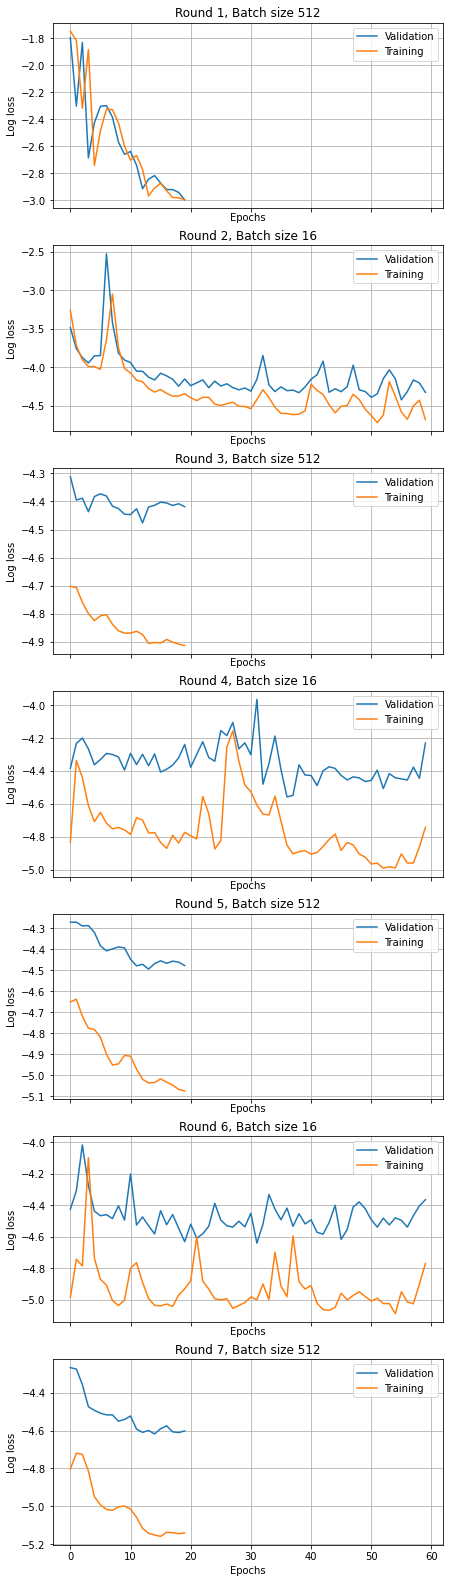

In [8]:
import matplotlib.pyplot as plt
import numpy as np

f, ax = plt.subplots(len(history), 1, figsize=(7, len(history)*4), sharex=True)

for i in range(len(history)):

  ax[i].set_title(titles[i])
  ax[i].plot(history[i].epoch, np.log(history[i].history['val_loss']), label='Validation')
  ax[i].plot(history[i].epoch, np.log(history[i].history['loss']), label='Training')
  ax[i].set_xlabel('Epochs')
  ax[i].set_ylabel('Log loss')
  ax[i].legend()
  ax[i].grid()

### Encoding

#### Encode the data

In [9]:
qt = pd.concat([x_train,x_test], axis=0)
qt.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Namibia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.595000,0.575000,0.560000,0.540000,0.52000,0.530000,0.510000,0.510000,0.500000
Congo (Kinshasa),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610000,0.600000,0.610000,0.595000,0.575000,0.560000,0.560000,0.56000,0.620438,0.620209,0.620000,0.620000
"US, Ohio",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.700000,0.684048,0.685000,0.710000,0.750000,0.771538,0.770000,0.781609,0.79000,0.789345,0.813857,0.826066,0.844272
"US, Norfolk County, MA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.760000,0.750000,0.73000,0.765000,0.740000,0.790000,0.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Switzerland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.835,0.901199,0.90081,0.905947,0.909437,0.917361,0.921964,0.931436,0.93415,0.948369,0.950546,0.952828,0.953288,0.959827,0.970091,0.970091,0.984636,0.990001,0.990268,0.990185,0.990189,0.99009,0.988659,0.987911,0.988667,0.989012


In [10]:
encoded_data=pd.DataFrame(vae.encoder.predict(qt),index=qt.index, columns=['Type'])
encoded_data.head()

,Type
Namibia,-0.311417
Congo (Kinshasa),-0.202541
"US, Ohio",-0.116906
"US, Norfolk County, MA",-2.169350
Switzerland,0.194702


#### Compute types

In [11]:
min_x, max_x, grid_n = -2, 2, 401
grid_x = np.linspace(min_x,max_x,grid_n)
decoded=vae.decoder.predict(grid_x)
decoded.shape

(401, 61)

#### Explore the distribution of types

In [0]:
import seaborn as sns

def plot_type_dist(encoded_data, grid_x, decoded, vertical_n, 
                   feature_labels, n_grid_lines=21):

  fig = plt.figure(figsize=(10,vertical_n*2.5),constrained_layout=True)
  gs = fig.add_gridspec(vertical_n, 1)
  ax1 = fig.add_subplot(gs[0,:])
  ax2 = fig.add_subplot(gs[1:,:])

  min_x, max_x, grid_n = grid_x[0], grid_x[-1], len(grid_x)
  grid_lines = np.linspace(min_x,max_x,n_grid_lines)

  ax1.set_title('Encoded data distribution')
  sns.kdeplot(encoded_data,bw=0.02, shade = True, ax=ax1, gridsize=2000)
  ax1.set_xticks( grid_lines )
  ax1.set_xlim(min_x,max_x)
  ax1.grid(axis='x')

  ax2.set_title('Generated types')

  sns.heatmap(decoded.T,cmap='viridis',ax=ax2, cbar_kws={'orientation':'horizontal'})
  ax2.set_xticks(np.linspace(1,grid_n,n_grid_lines))
  ax2.set_xticklabels(['{:.2}'.format(a) for a in grid_lines ])
  ax2.set_yticklabels(feature_labels)
  ax2.tick_params(axis='y',labelright=True, labelleft=False, 
                  left=False, labelrotation=0)
  ax2.grid(axis='x')

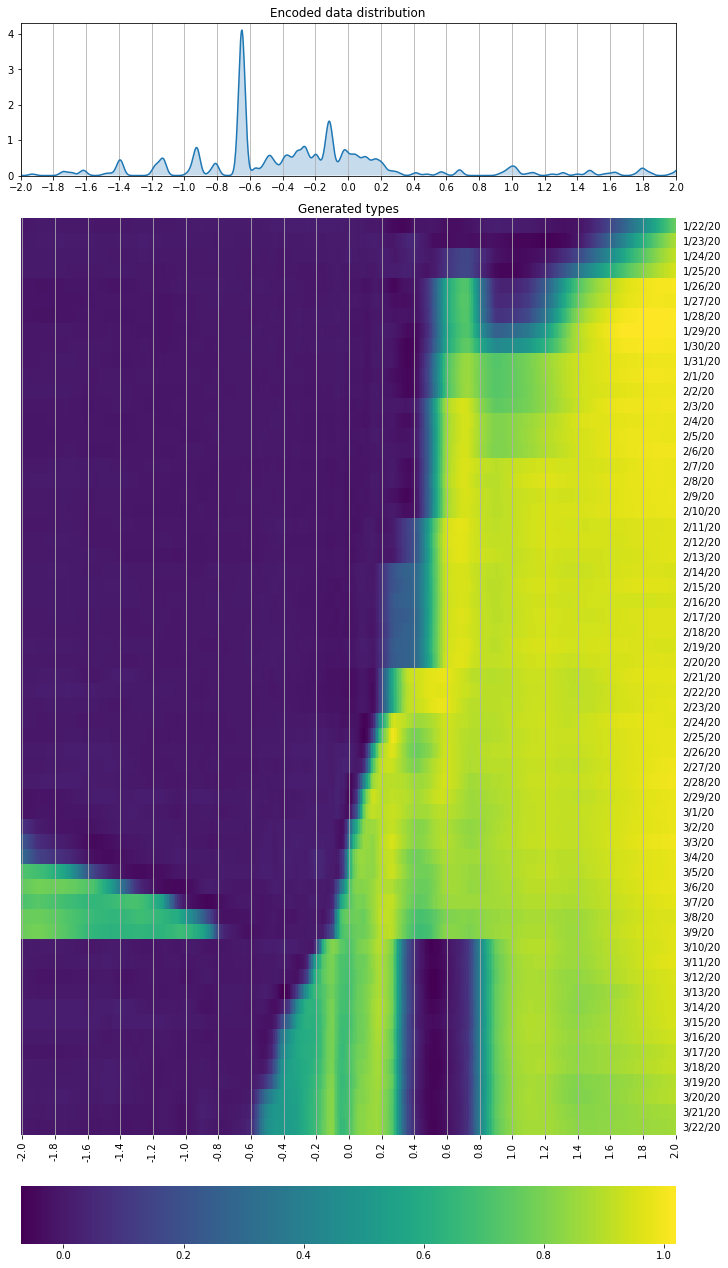

In [13]:
plot_type_dist(encoded_data.values.flatten(), grid_x, decoded, 
               vertical_n=7, feature_labels=qt.columns)

plt.savefig('plot_dist_type.png')

#### Compare to scaled version

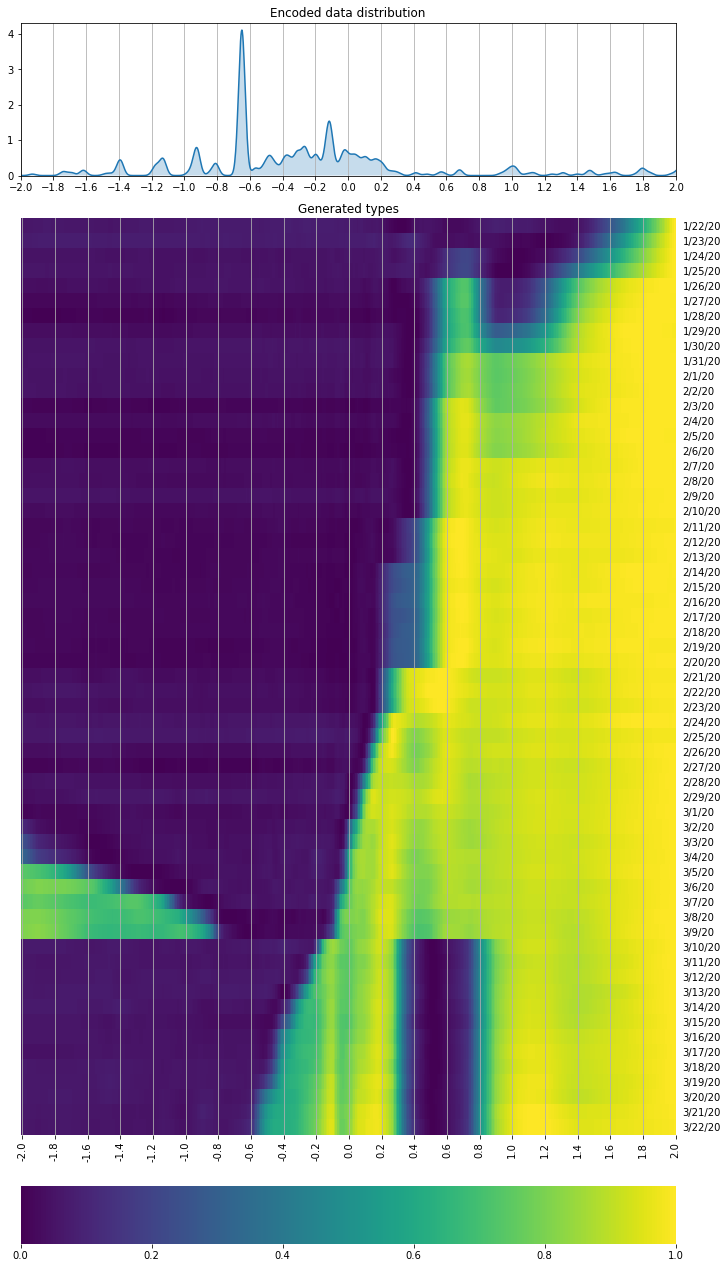

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

plot_type_dist(encoded_data.values.flatten(), grid_x, scaler.fit_transform(decoded), 
               vertical_n=7, feature_labels=qt.columns)

plt.savefig('plot_dist_type.png')

#### Explore encoding sorted data 

In [0]:
data = encoded_data.join(df2)

data = data.sort_values(by='Type')

data.to_csv('covid19_confirmed.csv')